In [1]:
import gc
from collections import OrderedDict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

In [2]:
train_df = pd.read_csv("../input/train.csv")
train_y = train_df['target'].values


np.random.seed(2018)
trn_idx = np.random.permutation(train_y.shape[0])
train_y = train_y[trn_idx]


del train_df, trn_idx
gc.collect()

14

In [2]:
!ls ../mydata

1d-CNN-Glove-maxlen120-onlypuncts-f1.pickle
1d-CNN-Glove-maxlen120-onlypuncts.npy
gru_atten_3-glove-cv0o5-e0-maxf95-onlypuncts.npy
gru_atten_3-glove-cv0o5-e1-maxf95-onlypuncts.npy
gru_atten_3-glove-cv0o5-e2-maxf95-onlypuncts.npy
gru_atten_3-glove-cv1o5-e0-maxf95-onlypuncts.npy
gru_atten_3-glove-cv1o5-e1-maxf95-onlypuncts.npy
gru_atten_3-glove-cv1o5-e2-maxf95-onlypuncts.npy
gru_atten_3-glove-cv2o5-e0-maxf95-onlypuncts.npy
gru_atten_3-glove-cv2o5-e1-maxf95-onlypuncts.npy
gru_atten_3-glove-cv2o5-e2-maxf95-onlypuncts.npy
gru_atten_3-glove-cv3o5-e0-maxf95-onlypuncts.npy
gru_atten_3-glove-cv3o5-e1-maxf95-onlypuncts.npy
gru_atten_3-glove-cv3o5-e2-maxf95-onlypuncts.npy
gru_atten_3-glove-cv4-maxf95-onlypuncts.npy
gru_atten_3-glove-cv4-maxlf95-onlypuncts-f1.pickle
gru_atten_3-glove-maxlen120-onlypuncts-f1.pickle
gru_atten_3-glove-maxlen120-onlypuncts.npy
gru_atten_3-mix-cv0o5-e0-maxf95-onlypuncts.npy
gru_atten_3-mix-cv0o5-e1-maxf95-onlypuncts.npy
gru_atten_3-mix-cv0o5-e2-maxf95-onlypuncts.npy
gr

In [3]:
model_name = 'original-cnn1d-mix'
i_fold = 0
i_epoch = 0
pred_val_y = np.load('../mydata/{}-cv{}o5-e{}-maxf95-onlypuncts.npy'.format(model_name, i_fold, i_epoch))

In [4]:
pred_val_y.shape

(326531,)

In [12]:
from sklearn.metrics import roc_curve, precision_recall_curve
def threshold_search(y_true, y_proba, plot=False):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    thresholds = np.append(thresholds, 1.001) 
    F = 2 / (1/precision + 1/recall)
    best_score = np.max(F)
    best_th = thresholds[np.argmax(F)]
    if plot:
        plt.plot(thresholds, F, '-b')
        plt.plot([best_th], [best_score], '*r')
        plt.show()
    search_result = {'threshold': best_th , 'f1': best_score}
    return search_result 

In [14]:
pred_val_y = np.zeros(train_y.shape[0])
i_epoch = 0
skf = StratifiedKFold(n_splits=4)
for i_fold, (train_index, val_index) in enumerate(skf.split(train_y, train_y)):
    pred_val_y[val_index] = np.load('../mydata/{}-cv{}o5-e{}-maxf95-onlypuncts.npy'.format(model_name, i_fold, i_epoch))

In [11]:
pred_val_y.shape

(1306122,)

In [16]:
threshold_search(train_y, pred_val_y)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


{'f1': 0.6573407250056128, 'threshold': 0.3074551522731781}

In [3]:
model_epoch_dict = {'original-cnn1d':2, 'gru_atten_3':3, 'gru_srk_atten':2, 'lstm_du':2,
                   'my_lstm_atten':5, 'lstm_atten':3}

In [4]:
model_dict = {}
for model in model_epoch_dict:
    for emb in ['glove', 'para', 'mix']:
        model_dict['{}-{}'.format(model, emb)] = model_epoch_dict[model]

In [5]:
model_dict

{'gru_atten_3-glove': 3,
 'gru_atten_3-mix': 3,
 'gru_atten_3-para': 3,
 'gru_srk_atten-glove': 2,
 'gru_srk_atten-mix': 2,
 'gru_srk_atten-para': 2,
 'lstm_atten-glove': 3,
 'lstm_atten-mix': 3,
 'lstm_atten-para': 3,
 'lstm_du-glove': 2,
 'lstm_du-mix': 2,
 'lstm_du-para': 2,
 'my_lstm_atten-glove': 5,
 'my_lstm_atten-mix': 5,
 'my_lstm_atten-para': 5,
 'original-cnn1d-glove': 2,
 'original-cnn1d-mix': 2,
 'original-cnn1d-para': 2}

In [6]:
for model_name in model_dict:
    for i_epoch in range(model_dict[model_name]):
        pred_val_y = np.zeros(train_y.shape[0])
        skf = StratifiedKFold(n_splits=4)
        for i_fold, (train_index, val_index) in enumerate(skf.split(train_y, train_y)):
            pred_val_y[val_index] = np.load('../mydata/{}-cv{}o5-e{}-maxf95-onlypuncts.npy'.format(model_name, i_fold, i_epoch))
        np.save('../mydata/{}-e{}-maxf95-onlypuncts.npy'.format(model_name, i_epoch), pred_val_y)

KeyboardInterrupt: 

In [7]:
model_pred_dict = OrderedDict()
for model_name in model_dict:
    for i_epoch in range(model_dict[model_name]):
        model_pred_dict[model_name + '-e' + str(i_epoch)] = np.load('../mydata/{}-e{}-maxf95-onlypuncts.npy'.format(model_name, i_epoch))

In [8]:
model_pred_dict

OrderedDict([('original-cnn1d-para-e0',
              array([0.00607511, 0.00545718, 0.00451326, ..., 0.00092483, 0.00130779,
                     0.00044003])),
             ('original-cnn1d-para-e1',
              array([0.00548738, 0.00120321, 0.00172822, ..., 0.00028432, 0.00666187,
                     0.00057375])),
             ('my_lstm_atten-glove-e0',
              array([0.001488  , 0.00596001, 0.00449626, ..., 0.01111588, 0.00076886,
                     0.00206293])),
             ('my_lstm_atten-glove-e1',
              array([0.00355036, 0.00523645, 0.00482213, ..., 0.01353329, 0.00059662,
                     0.00115508])),
             ('my_lstm_atten-glove-e2',
              array([0.000374  , 0.00417173, 0.00452934, ..., 0.03072411, 0.00055401,
                     0.00083281])),
             ('my_lstm_atten-glove-e3',
              array([0.0003815 , 0.00127459, 0.00136744, ..., 0.00767516, 0.00020094,
                     0.00046899])),
             ('my_lstm_atten

In [46]:
for model_name in model_pred_dict:
    print(model_name)
    print(threshold_search(train_y, model_pred_dict[model_name]))

original-cnn1d-para-e0


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


{'threshold': 0.25561219453811646, 'f1': 0.6536196705099679}
original-cnn1d-para-e1
{'threshold': 0.27008676528930664, 'f1': 0.6628232370734198}
my_lstm_atten-glove-e0
{'threshold': 0.32252490520477295, 'f1': 0.6506281123007982}
my_lstm_atten-glove-e1
{'threshold': 0.39034900069236755, 'f1': 0.6666858723208112}
my_lstm_atten-glove-e2
{'threshold': 0.32801151275634766, 'f1': 0.6793939393939394}
my_lstm_atten-glove-e3
{'threshold': 0.3452904522418976, 'f1': 0.6829491349105188}
my_lstm_atten-glove-e4
{'threshold': 0.3626055419445038, 'f1': 0.6855132277585847}
gru_srk_atten-mix-e0
{'threshold': 0.3225950002670288, 'f1': 0.655846499551747}
gru_srk_atten-mix-e1
{'threshold': 0.30662664771080017, 'f1': 0.6683909191899052}
my_lstm_atten-para-e0
{'threshold': 0.35634374618530273, 'f1': 0.6495422496955002}
my_lstm_atten-para-e1
{'threshold': 0.3601759076118469, 'f1': 0.6672206161533979}
my_lstm_atten-para-e2
{'threshold': 0.38615453243255615, 'f1': 0.6742888061588769}
my_lstm_atten-para-e3
{'thr

In [47]:
threshold_search(train_y, np.mean(model_pred_dict.values(), axis=0))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


{'f1': 0.6907420169997703, 'threshold': 0.3269689454167497}

In [63]:
a_model_name_list = ['original-cnn1d-glove', 'lstm_du-mix',
                   'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para', 'my_lstm_atten-mix']
epoch_list = [2, 2, 3, 3, 3, 5]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


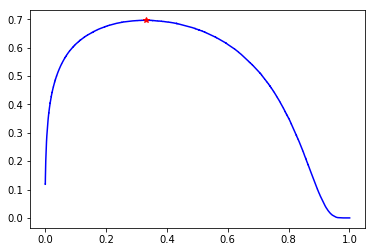

{'f1': 0.6965643667990955, 'threshold': 0.3296375796198845}

In [64]:
pred_list = []
for model_name, epoch in zip(a_model_name_list, epoch_list):
    pred_list.append(model_pred_dict['{}-e{}'.format(model_name, epoch-1)])

threshold_search(train_y, np.mean(pred_list, axis=0), plot=True)

# なぜかめっちゃいい？

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


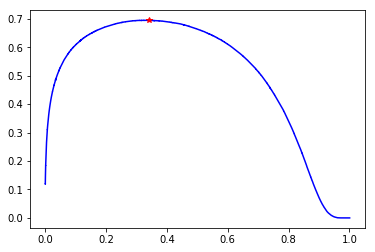

{'f1': 0.6946769236152828, 'threshold': 0.3408879041671753}

In [68]:
## snapshot ensembleしても良くならん、、、
a_model_name_list = ['original-cnn1d-glove', 'lstm_du-mix',
                   'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para', 'my_lstm_atten-mix']
epoch_list = [2, 2, 3, 3, 3, 5]

pred_list = []
for model_name, epoch in zip(a_model_name_list, epoch_list):
    if epoch >= 3:
        for from_last_epoch in range(2):
            pred_list.append(model_pred_dict['{}-e{}'.format(model_name, epoch-1-from_last_epoch)])
    else:
        from_last_epoch = 0
        pred_list.append(model_pred_dict['{}-e{}'.format(model_name, epoch-1-from_last_epoch)])
        

threshold_search(train_y, np.mean(pred_list, axis=0), plot=True)


original-cnn1d-glove-e1
lstm_du-mix-e1
lstm_atten-mix-e2
lstm_atten-glove-e2
lstm_atten-para-e2
my_lstm_atten-mix-e4


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


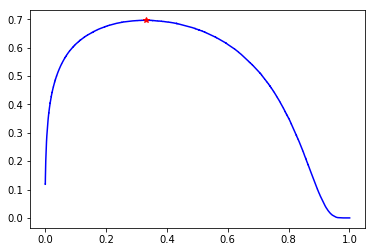

{'f1': 0.6965643667990955, 'threshold': 0.3296375796198845}

In [75]:
a_model_name_list = ['original-cnn1d-glove', 'lstm_du-mix',
                   'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para', 'my_lstm_atten-mix']
epoch_list = [2, 2, 3, 3, 3, 5]

pred_list = []
for model_name, epoch in zip(a_model_name_list, epoch_list):
    if epoch >= 5:
        for from_last_epoch in range(1):
            print('{}-e{}'.format(model_name, epoch-1-from_last_epoch))
            pred_list.append(model_pred_dict['{}-e{}'.format(model_name, epoch-1-from_last_epoch)])
    else:
        from_last_epoch = 0
        print('{}-e{}'.format(model_name, epoch-1-from_last_epoch))
        
        pred_list.append(model_pred_dict['{}-e{}'.format(model_name, epoch-1-from_last_epoch)])
        

threshold_search(train_y, np.mean(pred_list, axis=0), plot=True)


In [80]:
a_model_name_list = ['original-cnn1d-glove', 'lstm_du-mix',
                   'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para', 'my_lstm_atten-mix']
epoch_list = [2, 2, 3, 3, 3, 5]
emb_list = ['glove', 'para', 'mix']

model_name_list_list = []
for i in range(3):
    for j in range(3):
        for k in range(3):
            model_name_list_list.append(['original-cnn1d-{}'.format(emb_list[i]), 'lstm_du-{}'.format(emb_list[j]),
                   'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para', 'my_lstm_atten-{}'.format(emb_list[k])])
for a_model_name_list in model_name_list_list:
    pred_list = []
    for model_name, epoch in zip(a_model_name_list, epoch_list):
        pred_list.append(model_pred_dict['{}-e{}'.format(model_name, epoch-1)])
    
    print(a_model_name_list)
    print(threshold_search(train_y, np.mean(pred_list, axis=0)))

# 良かったね
#['original-cnn1d-para', 'lstm_du-glove', 'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para', 'my_lstm_atten-glove']
#{'threshold': 0.3357352664073308, 'f1': 0.6969338528620466}

['original-cnn1d-glove', 'lstm_du-glove', 'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para', 'my_lstm_atten-glove']


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


{'threshold': 0.34663550555706024, 'f1': 0.6963940553008847}
['original-cnn1d-glove', 'lstm_du-glove', 'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para', 'my_lstm_atten-para']
{'threshold': 0.3417603423198064, 'f1': 0.6962377431094833}
['original-cnn1d-glove', 'lstm_du-glove', 'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para', 'my_lstm_atten-mix']
{'threshold': 0.33347247168421745, 'f1': 0.6964590369416107}
['original-cnn1d-glove', 'lstm_du-para', 'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para', 'my_lstm_atten-glove']
{'threshold': 0.3342484012246132, 'f1': 0.6960574306721473}
['original-cnn1d-glove', 'lstm_du-para', 'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para', 'my_lstm_atten-para']
{'threshold': 0.3462435801823934, 'f1': 0.695404142629654}
['original-cnn1d-glove', 'lstm_du-para', 'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para', 'my_lstm_atten-mix']
{'threshold': 0.3255334173639615, 'f1': 0.6960843164869669}
['original-cnn1d-glove', 'lstm_du-mix'

In [ ]:
pred_list = []
for model_name, epoch in zip(a_model_name_list, epoch_list):
    for from_last_epoch in range(2):
        pred_list.append(model_pred_dict['{}-e{}'.format(model_name, epoch-1-from_last_epoch)])

threshold_search(train_y, np.mean(pred_list, axis=0), plot=True)


In [50]:
a_model_name_list = ['original-cnn1d-glove', 'lstm_du-mix',
                   'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para', 'my_lstm_atten-mix']
epoch_list = [2, 2, 3, 3, 3, 4]
pred_list = []
for model_name, epoch in zip(a_model_name_list, epoch_list):
    pred_list.append(model_pred_dict['{}-e{}'.format(model_name, epoch-1)])

threshold_search(train_y, np.mean(pred_list, axis=0))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


{'f1': 0.6958707401978746, 'threshold': 0.323395902911822}

In [62]:
a_model_name_list = ['original-cnn1d-glove', 'lstm_du-mix',
                   'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para']
epoch_list = [2, 2, 3, 3, 3]
pred_list = []
for model_name, epoch in zip(a_model_name_list, epoch_list):
    pred_list.append(model_pred_dict['{}-e{}'.format(model_name, epoch-1)])

threshold_search(train_y, np.mean(pred_list, axis=0))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


{'f1': 0.6946476216763271, 'threshold': 0.3265787839889526}

In [82]:
a_model_name_list = ['original-cnn1d-glove', 'lstm_du-mix', 'gru_atten_3-mix', 'gru_srk_atten-mix',
                   'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para']
epoch_list = [2, 2, 3, 2, 3, 3, 3]
pred_list = []
for model_name, epoch in zip(a_model_name_list, epoch_list):
    pred_list.append(model_pred_dict['{}-e{}'.format(model_name, epoch-1)])

threshold_search(train_y, np.mean(pred_list, axis=0))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


{'f1': 0.6950402456613782, 'threshold': 0.33212595326559885}

In [85]:
a_model_name_list = ['original-cnn1d-glove', 'lstm_du-mix', 'gru_atten_3-mix',
                   'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para']
epoch_list = [2, 2, 3, 3, 3, 3]
pred_list = []
for model_name, epoch in zip(a_model_name_list, epoch_list):
    pred_list.append(model_pred_dict['{}-e{}'.format(model_name, epoch-1)])

threshold_search(train_y, np.mean(pred_list, axis=0))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


{'f1': 0.6954956607472457, 'threshold': 0.31913473457098007}

In [13]:
import copy
_a_model_name_list = ['original-cnn1d-para', 'lstm_du-glove', 'lstm_atten-mix', 'lstm_atten-glove', 'lstm_atten-para', 'my_lstm_atten-glove']
_epoch_list = [2, 2, 3, 3, 3, 5]
for i_model in range(len(_a_model_name_list)):
    epoch_list = copy.copy(_epoch_list)
    del epoch_list[i_model]
    a_model_name_list = copy.copy(_a_model_name_list)
    del a_model_name_list[i_model]
    
    pred_list = []
    for model_name, epoch in zip(a_model_name_list, epoch_list):
        pred_list.append(model_pred_dict['{}-e{}'.format(model_name, epoch-1)])

    print(i_model, threshold_search(train_y, np.mean(pred_list, axis=0)))

# なぜかめっちゃいい？

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


(0, {'threshold': 0.3550958275794983, 'f1': 0.6964264860446107})
(1, {'threshold': 0.3259244680404663, 'f1': 0.695703816459382})
(2, {'threshold': 0.32518270611763, 'f1': 0.6957866654400772})
(3, {'threshold': 0.32291087359189985, 'f1': 0.6962470635420844})
(4, {'threshold': 0.3299166291952133, 'f1': 0.6958445943999125})
(5, {'threshold': 0.32831805050373075, 'f1': 0.6951101757145087})
